# LambdaG Results

This notebook is used to gather and summarise the results for the different methods for the LambdaG testing. The different results are as follows:
* LambdaG Standard
* LambdaG Max Similarity

In [60]:
import sys
import os

import pandas as pd

from docx import Document

In [61]:
sys.path.append(os.path.abspath('../src'))

from read_and_write_docs import read_jsonl
from performance import aggregate_results_data, performance, distribution_plot, roc_plot, tippett_plot

## Raw Results Load

In [62]:
enron_test = read_jsonl('/Volumes/BCross/datasets/author_verification/lambda_g_results/Enron_test_qwen2.5_1.5b_instruct_raw.jsonl')
enron_training = read_jsonl('/Volumes/BCross/datasets/author_verification/lambda_g_results/Enron_training_qwen2.5_1.5b_instruct_raw.jsonl')
wiki_test = read_jsonl('/Volumes/BCross/datasets/author_verification/lambda_g_results/Wiki_test_qwen2.5_1.5b_instruct_raw.jsonl')
wiki_training = read_jsonl('/Volumes/BCross/datasets/author_verification/lambda_g_results/Wiki_training_qwen2.5_1.5b_instruct_raw.jsonl')

enron_max_sim = read_jsonl('/Volumes/BCross/datasets/author_verification/lambda_g_results/Enron_training_qwen2.5_1.5b_instruct_max_sim.jsonl')
wiki_max_sim = read_jsonl('/Volumes/BCross/datasets/author_verification/lambda_g_results/Wiki_training_qwen2.5_1.5b_instruct_max_sim.jsonl')

## Aggregate Results

In [63]:
enron_training

,repetition,corpus,token_type,data_type,problem,known_author,unknown_author,target,score
0,1,Enron,Qwen2.5-1.5B-Instruct,training,Andy.zipper vs Andy.zipper,Andy.zipper,Andy.zipper,True,4807.909724
1,1,Enron,Qwen2.5-1.5B-Instruct,training,Andy.zipper vs Barry.tycholiz,Andy.zipper,Barry.tycholiz,False,-7041.654951
2,1,Enron,Qwen2.5-1.5B-Instruct,training,Barry.tycholiz vs Barry.tycholiz,Barry.tycholiz,Barry.tycholiz,True,11962.477431
3,1,Enron,Qwen2.5-1.5B-Instruct,training,Barry.tycholiz vs Benjamin.rogers,Barry.tycholiz,Benjamin.rogers,False,2756.323894
4,1,Enron,Qwen2.5-1.5B-Instruct,training,Benjamin.rogers vs Benjamin.rogers,Benjamin.rogers,Benjamin.rogers,True,7817.807861
...,...,...,...,...,...,...,...,...,...
315,5,Enron,Qwen2.5-1.5B-Instruct,training,K.allen vs Kam.keiser,K.allen,Kam.keiser,False,-13451.678264
316,5,Enron,Qwen2.5-1.5B-Instruct,training,Kam.keiser vs Kam.keiser,Kam.keiser,Kam.keiser,True,24774.031155
317,5,Enron,Qwen2.5-1.5B-Instruct,training,Kam.keiser vs Kate.symes,Kam.keiser,Kate.symes,False,-19645.391852
318,5,Enron,Qwen2.5-1.5B-Instruct,training,Kate.symes vs Andy.zipper,Kate.symes,Andy.zipper,False,-8903.219321


In [64]:
enron_training_agg = aggregate_results_data(enron_training, group_cols=['corpus', 'data_type', 'problem', 'target'])
enron_test_agg = aggregate_results_data(enron_test, group_cols=['corpus', 'data_type', 'problem', 'target'])
wiki_training_agg = aggregate_results_data(wiki_training, group_cols=['corpus', 'data_type', 'problem', 'target'])
wiki_test_agg = aggregate_results_data(wiki_test, group_cols=['corpus', 'data_type', 'problem', 'target'])

combined_standard_results = pd.concat([enron_training_agg, enron_test_agg, wiki_training_agg, wiki_test_agg], ignore_index=True)
combined_standard_results['description'] = combined_standard_results['corpus'] + ' - ' + combined_standard_results['data_type']

In [65]:
combined_standard_results

,corpus,data_type,problem,target,score,description
0,Enron,training,Andy.zipper vs Andy.zipper,True,4758.517163,Enron - training
1,Enron,training,Andy.zipper vs Barry.tycholiz,False,-7332.258865,Enron - training
2,Enron,training,Barry.tycholiz vs Barry.tycholiz,True,12158.370874,Enron - training
3,Enron,training,Barry.tycholiz vs Benjamin.rogers,False,3422.651657,Enron - training
4,Enron,training,Benjamin.rogers vs Benjamin.rogers,True,8476.322207,Enron - training
...,...,...,...,...,...,...
529,Wiki,test,Xtv vs Yoenit,False,-6896.839110,Wiki - test
530,Wiki,test,Yoenit vs Yoenit,True,8863.128322,Wiki - test
531,Wiki,test,Yoenit vs ZjarriRrethues,False,-1223.373825,Wiki - test
532,Wiki,test,ZjarriRrethues vs 142.196.88.228,False,-5751.305962,Wiki - test


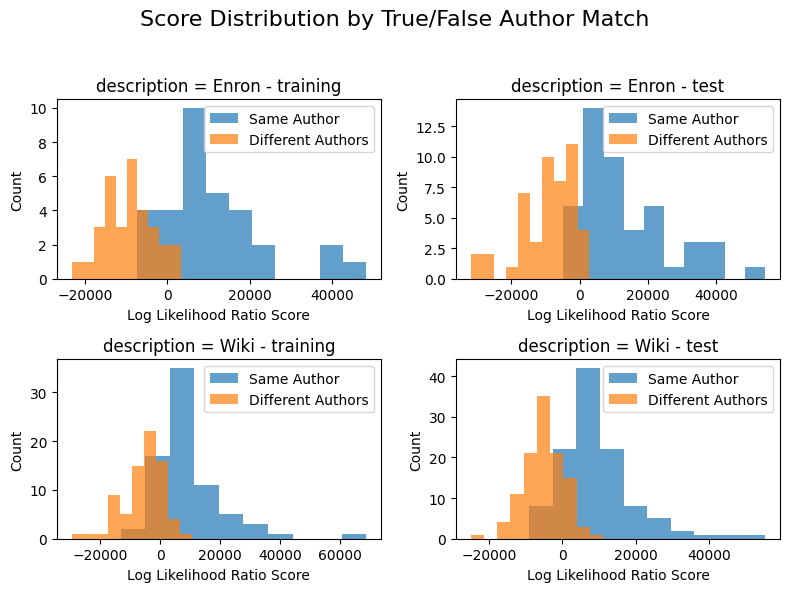

In [66]:
distribution_plot(combined_standard_results, score_col='score', target_col='target', group_col='description')

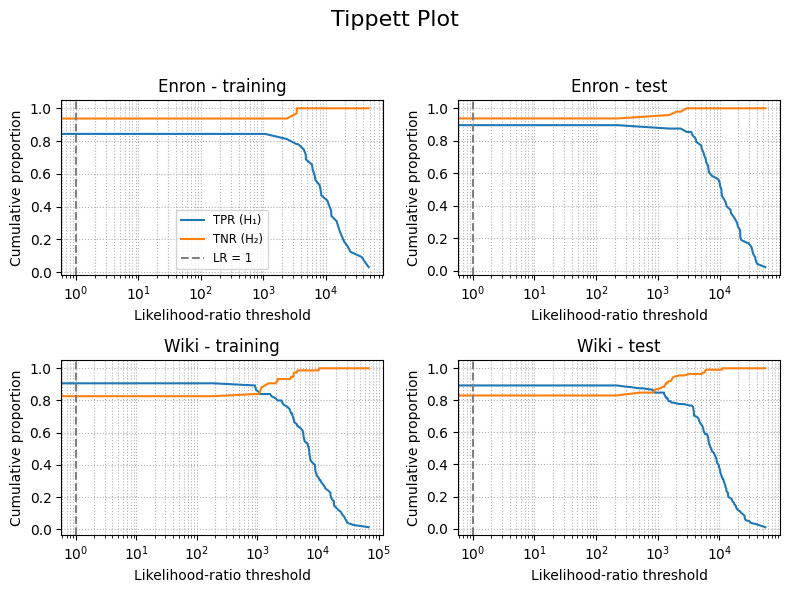

In [69]:
tippett_plot(combined_standard_results, group_col='description')

In [49]:
score_col = 'score'
target_col = 'target'
combined_standard_performance = performance(combined_standard_results,
                                            score_col,
                                            target_col,
                                            group_cols='description'
                                        )
combined_standard_performance

,description,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Enron - test,0.316194,0.316194,0.083333,2.734153,-1.967534,48,48,0.971354,0.895833,0.913043,0.875000,0.893617,42,4,6,44
1,Enron - training,0.433354,0.433354,0.125000,1.644748,-1.087043,32,32,0.943359,0.875000,0.875000,0.875000,0.875000,28,4,4,28
2,Wiki - test,0.490985,0.490985,0.151786,1.296741,-0.905208,112,112,0.926578,0.848214,0.848214,0.848214,0.848214,95,17,17,95
3,Wiki - training,0.526181,0.526181,0.160000,1.262601,-0.993469,75,75,0.923022,0.840000,0.840000,0.840000,0.840000,63,12,12,63


In [50]:
combined_standard_performance = combined_standard_performance.round(4) 

doc = Document()

rows, cols = combined_standard_performance.shape[0] + 1, combined_standard_performance.shape[1]
table = doc.add_table(rows=rows, cols=cols)

for j, col_name in enumerate(combined_standard_performance.columns):
    table.cell(0, j).text = col_name

for i, row in enumerate(combined_standard_performance.itertuples(index=False), start=1):
    for j, val in enumerate(row):
        table.cell(i, j).text = str(val)
        
doc.save('/Volumes/BCross/datasets/author_verification/lambda_g_results/combined_standard_performance.docx')



BlockingIOError: [Errno 35] Resource temporarily unavailable: '/Volumes/BCross/datasets/author_verification/lambda_g_results/combined_standard_performance.docx'

# Max Similarity

In [54]:
enron_max_sim_agg = aggregate_results_data(enron_max_sim, group_cols=['corpus', 'data_type', 'problem', 'target'])
wiki_max_sim_agg = aggregate_results_data(wiki_max_sim, group_cols=['corpus', 'data_type', 'problem', 'target'])

combined_max_sim_results = pd.concat([enron_max_sim_agg, wiki_max_sim_agg], ignore_index=True)
combined_max_sim_results['description'] = combined_max_sim_results['corpus'] + ' - ' + combined_max_sim_results['data_type']

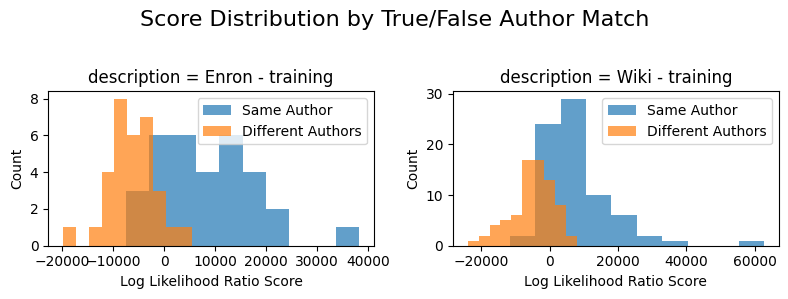

In [55]:
distribution_plot(combined_max_sim_results, score_col='score', target_col='target', group_col='description')

In [56]:
score_col = 'score'
target_col = 'target'
combined_max_sim_performance = performance(combined_max_sim_results,
                                           score_col,
                                           target_col,
                                           group_cols='description'
                                        )
combined_max_sim_performance

,description,Cllr,Cllr_min,EER,Mean_TRUE_LLR,Mean_FALSE_LLR,TRUE_trials,FALSE_trials,AUC,Balanced_Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Enron - training,0.527494,0.527494,0.09375,1.404785,-0.789995,32,32,0.914062,0.875000,0.928571,0.812500,0.866667,26,2,6,30
1,Wiki - training,0.574373,0.574373,0.16000,1.092371,-0.825315,75,75,0.904000,0.806667,0.802632,0.813333,0.807947,61,15,14,60


In [59]:
combined_max_sim_performance = combined_max_sim_performance.round(4) 

doc = Document()

rows, cols = combined_max_sim_performance.shape[0] + 1, combined_max_sim_performance.shape[1]
table = doc.add_table(rows=rows, cols=cols)

for j, col_name in enumerate(combined_max_sim_performance.columns):
    table.cell(0, j).text = col_name

for i, row in enumerate(combined_max_sim_performance.itertuples(index=False), start=1):
    for j, val in enumerate(row):
        table.cell(i, j).text = str(val)
        
doc.save('/Volumes/BCross/datasets/author_verification/lambda_g_results/combined_max_sim_performance.docx')

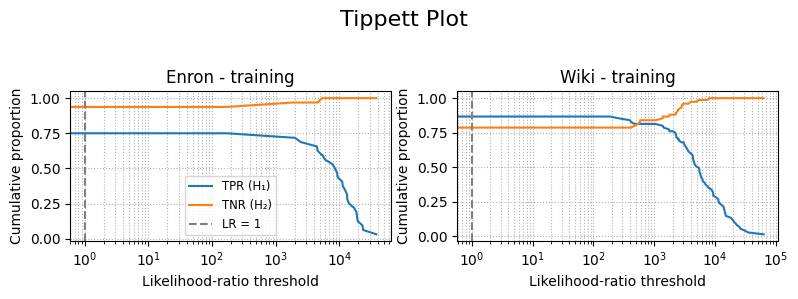

In [71]:
tippett_plot(combined_max_sim_results, group_col='description')